In [1]:
# Analyze the power consumption of the system

In [2]:
import os
import numpy as np

# Import the local utils.py file
import sys
sys.path.append(os.path.join(os.getcwd(), '../'))
from utils import *
from preprocessing.preprocessing_utils import build_df
from analysis_utils import key_histogram

In [3]:
df = build_df()

In [4]:
# Only keep the relevant columns with units [W]
power_cols = [col for col in df.columns if '[W]' in col]

In [5]:
power_cols

['CPU Package Power [W]',
 'IA Cores Power [W]',
 'Total DRAM Power [W]',
 'Rest-of-Chip Power [W]',
 'PL1 Power Limit [W]',
 'PL2 Power Limit [W]',
 'GPU Power [W]',
 'GPU Rail Powers (avg) [W]',
 'GPU PCIe +12V Input Power [W]',
 'GPU 8-pin #1 Input Power [W]',
 'GPU 8-pin #2 Input Power [W]',
 'GPU Core (NVVDD) Input Power (sum) [W]',
 'GPU Core (NVVDD) Output Power (sum) [W]',
 'GPU FBVDD_Q Input Power (sum) [W]']

In [6]:
unique_power_cols = ['CPU Package Power [W]', 'Total DRAM Power [W]', 'GPU Power [W]']

In [7]:
# Compute the sum of all power consumption using the unique_power_cols
df['Total Power [W]'] = df[unique_power_cols].sum(axis=1)

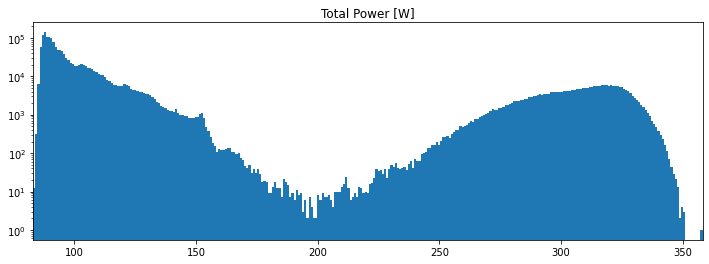

In [8]:
key_histogram(df, key='Total Power [W]', bins=int(np.power(len(df), 0.4)), figsize=(12, 4), log=True);

In [9]:
# Compute the total power consumption in kWh
# Integrate the power consumption over time
# Use the 'Interval' column
# Since the 'Interval' column also contains the pauses between measurements, we need to remove the pauses

# Define which intervals count as a pause (>= 5s)
minimum_pause_length = 5

# Define a boolean mask for the pauses
no_pause_mask = df['Interval'] < minimum_pause_length
print(f'Number of pauses: {np.sum(~no_pause_mask)}')

# Remove the pauses and the first measurement since it will be NaN
dt_without_pauses = df['Interval'].where(no_pause_mask)[1:]
total_power_without_pauses = df['Total Power [W]'].where(no_pause_mask)[1:]

# Compute the total power consumption in kWh
total_energy = dt_without_pauses / 3600 * total_power_without_pauses / 1000

Number of pauses: 176


In [10]:
print(f'Total energy consumption: {total_energy.sum():.2f} kWh')

Total energy consumption: 31.11 kWh


In [11]:
# Compute the average daily energy consumption
timestamp_span = df['Timestamp'].max() - df['Timestamp'].min()
days_span = timestamp_span / (24 * 3600)

In [12]:
print(f'Average power consumption per day: {total_energy.sum() / days_span:.2f} kWh')

Average power consumption per day: 0.65 kWh
